# **Problem Statement**

**Solomon Akatakpo (PhD.)**

**Business Context**

Predicting machine failures through system data analysis and taking preventive measures is crucial in the manufacturing industry where various machines and equipment are used. This practice, known as predictive maintenance, has become increasingly popular with the rise of data availability and computational resources. It provides benefits such as minimized equipment downtime, reduced costs associated with spares and supplies, and more.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company that produces numerous products on several CNC machines. To implement a data-driven maintenance process, the company has set up sensors to collect data on various parameters involved in the manufacturing process. They have initially tested this process in an injector nozzle manufacturing shop, where they produce fuel injector nozzles using various manufacturing processes. By collecting data on an hourly basis from these sensors, AutoMobi aims to develop machine learning-based solutions to optimize costs, improve failure predictability, and minimize equipment downtime.

**Objective**


AutoMobi's fuel injector nozzle manufacturing unit has been experiencing frequent equipment failures, disrupting the manufacturing process. As a result, they have contacted the Data Science team and provided data for the past three months. As a member of the team, your responsibility is to analyze the data, build a machine learning model to identify possible machine failures, determine the key factors impacting machine health, and offer cost optimization recommendations to the management.

**Data Description**
The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

* UDI: Unique identifier ranging from 1 to 10000
* Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
* Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
* Process Temperature: Tool tip temperature measured in Kelvin
* Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
* Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
* Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
* Failure: 0-No failure, 1-Failure


## Importing the necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [3]:
# Load Dataset

data_main = pd.read_csv("Machine_Failure_Case_Study.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another variable to avoid any changes to original data
data = data_main.copy()

<IPython.core.display.Javascript object>

# **Data Overview**


In [5]:
data.head(10) #view the first 10 row

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.10000,323.74074,1551,42.80000,0,0
1,2,L,298.20000,324.11111,1408,46.30000,3,0
2,3,L,298.10000,323.37037,1498,49.40000,5,0
3,4,L,298.20000,323.74074,1433,39.50000,7,0
4,5,L,298.20000,324.11111,1408,40.00000,9,0
5,6,M,298.10000,323.74074,1425,41.90000,11,0
6,7,L,298.10000,323.74074,1558,42.40000,14,0
7,8,L,298.10000,323.74074,1527,40.20000,16,0
8,9,M,298.30000,324.11111,1667,28.60000,18,0
9,10,M,298.50000,325.22222,1741,28.00000,21,0


<IPython.core.display.Javascript object>

In [6]:
data.tail(10)  # view the last 10 rows

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
9990,9991,L,298.80000,323.37037,1527,36.20000,3,0
9991,9992,M,298.90000,323.00000,1827,26.10000,5,0
9992,9993,L,298.80000,323.00000,1484,39.20000,8,0
9993,9994,L,298.80000,323.00000,1401,47.30000,10,0
9994,9995,L,298.80000,322.62963,1634,27.90000,12,0
9995,9996,M,298.80000,323.00000,1604,29.50000,14,0
9996,9997,H,298.90000,323.00000,1632,31.80000,17,0
9997,9998,M,299.00000,323.74074,1645,33.40000,22,0
9998,9999,H,299.00000,324.11111,1408,48.50000,25,0
9999,10000,M,299.00000,324.11111,1500,40.20000,30,0


<IPython.core.display.Javascript object>

# **Understanding the shape of the data**



In [7]:
data.shape

(10000, 8)

<IPython.core.display.Javascript object>

The dataset contain 1000 rows and 8 coulmns

# **Check the data types of the columns**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


<IPython.core.display.Javascript object>

All other columns are numerical except the type column which is object type

# **Checking for missing values**

In [9]:
# checking for null values
data.isnull().sum()

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

<IPython.core.display.Javascript object>

* There are no null values in the dataset

# **Checking for duplicate values**

In [10]:
# checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data

# **Dropping the coolumn with all unique values**

In [12]:
data.UDI.nunique()

10000

<IPython.core.display.Javascript object>

* The UDI column contains only unique values, so we can drop it

In [14]:
data = data.drop(["UDI"], axis=1)

<IPython.core.display.Javascript object>

# **Statistical summary of the data**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.00000,300.00493,2.00026,295.30000,298.30000,300.10000,301.50000,304.50000
Process temperature,10000.00000,328.94652,5.49531,313.00000,324.48148,329.29630,333.00000,343.00000
Rotational speed,10000.00000,1538.77610,179.28410,1168.00000,1423.00000,1503.00000,1612.00000,2886.00000
Torque,10000.00000,39.98691,9.96893,3.80000,33.20000,40.10000,46.80000,76.60000
Tool wear,10000.00000,107.95100,63.65415,0.00000,53.00000,108.00000,162.00000,253.00000
Failure,10000.00000,0.03390,0.18098,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

* The air temperature ranges from 300K to 304.5K. Usually, machine shops are maintained in control environment so the temperature range looks usual.
* The process temperature is a bit higher than the air temperature and that's quite usual because heat is continuously generated during the machining process.
* The rotational speed has a max value of 2886rpm while 1612rpm at the 75th percentile. Some of the processes are performed at a higher speed than usual.

# **Exploratory Data Analysis (EDA)**

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

# **Univariate Analysis**

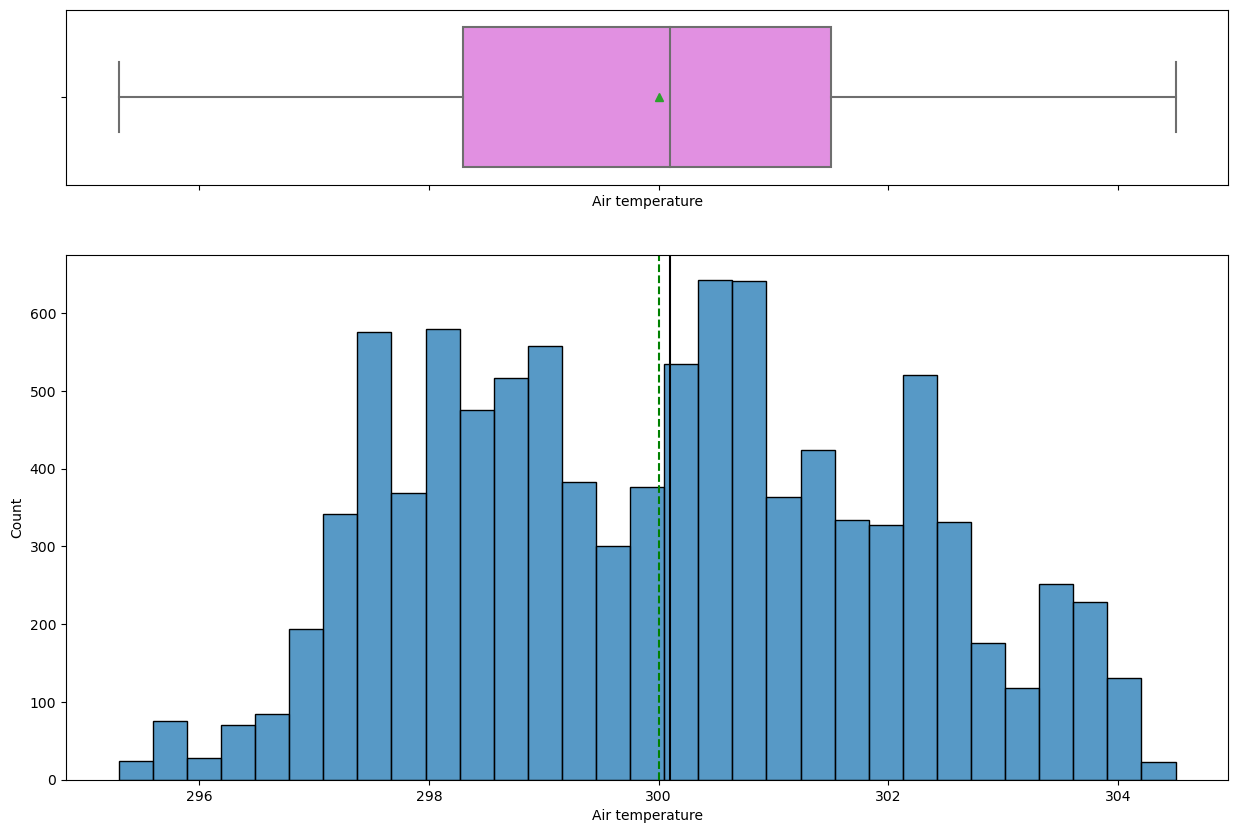

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Air temperature")

* The air temperature distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

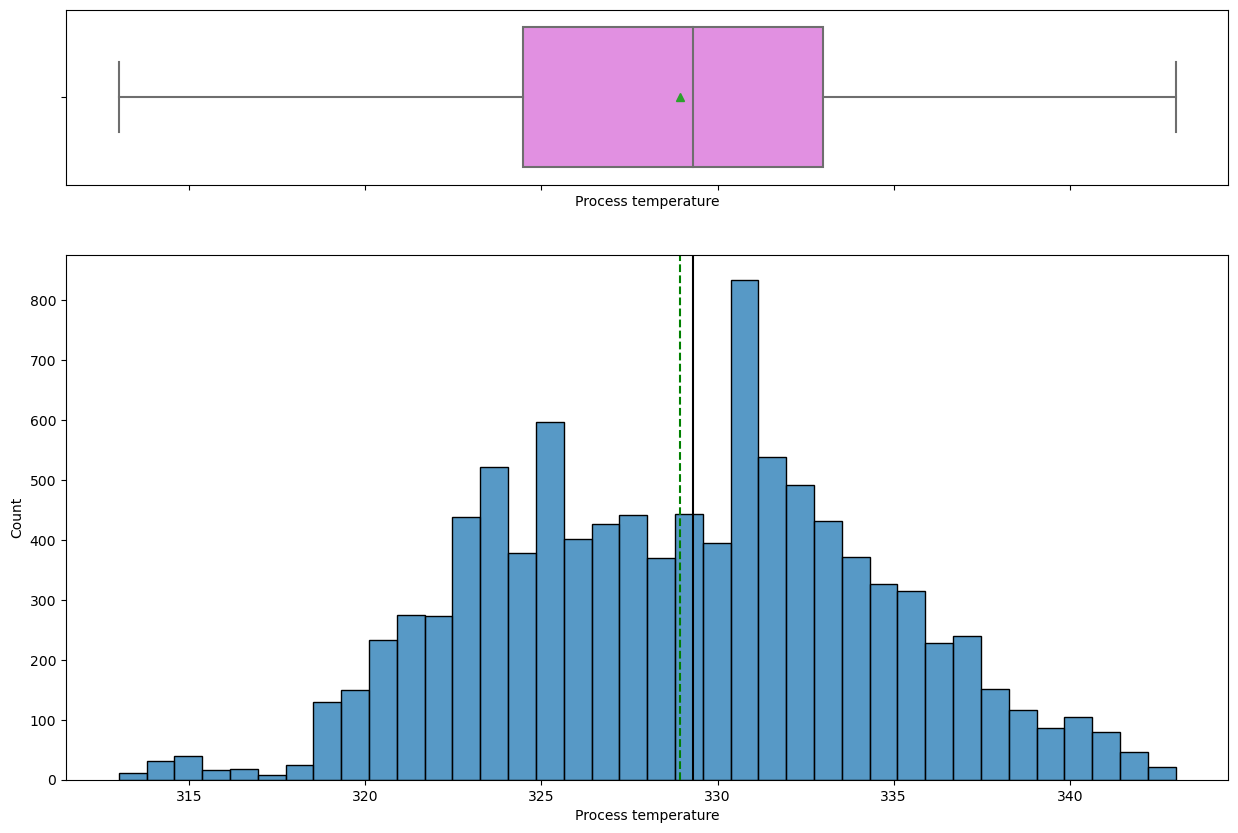

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

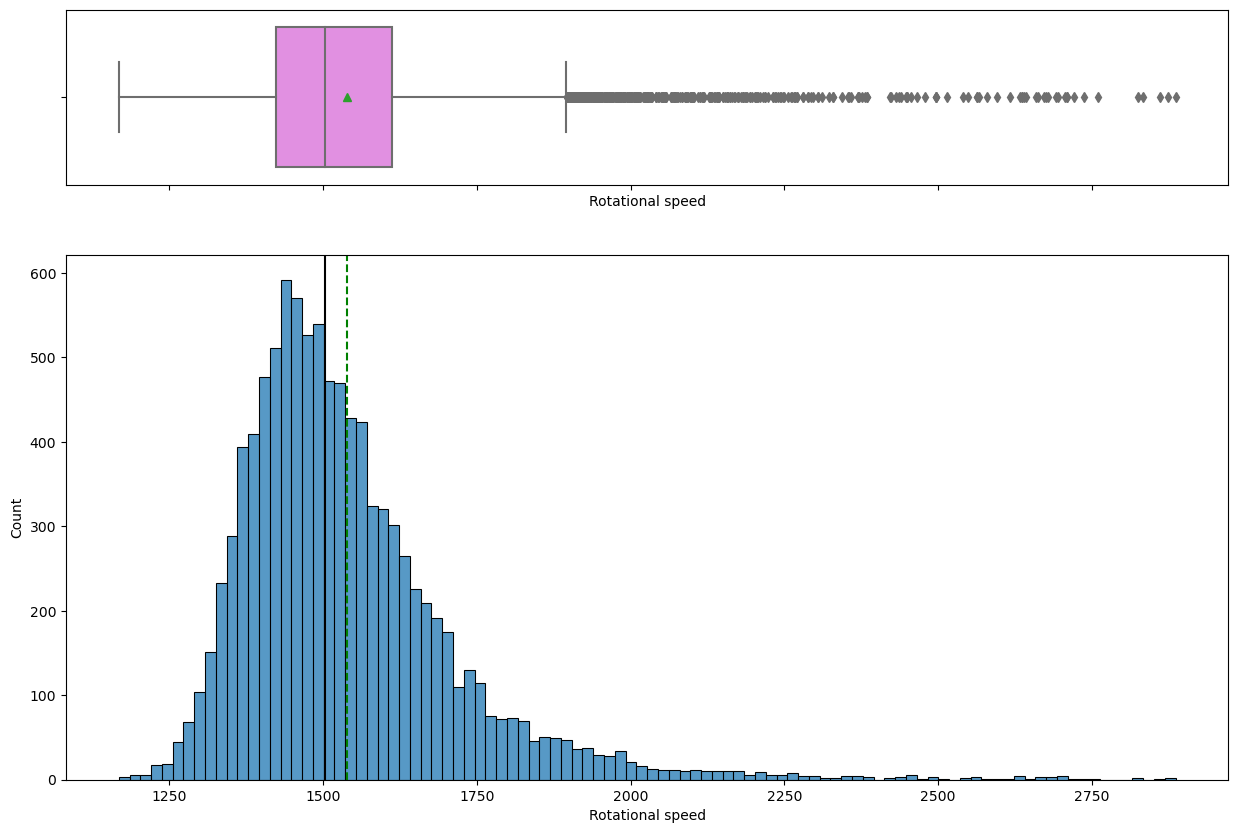

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed.

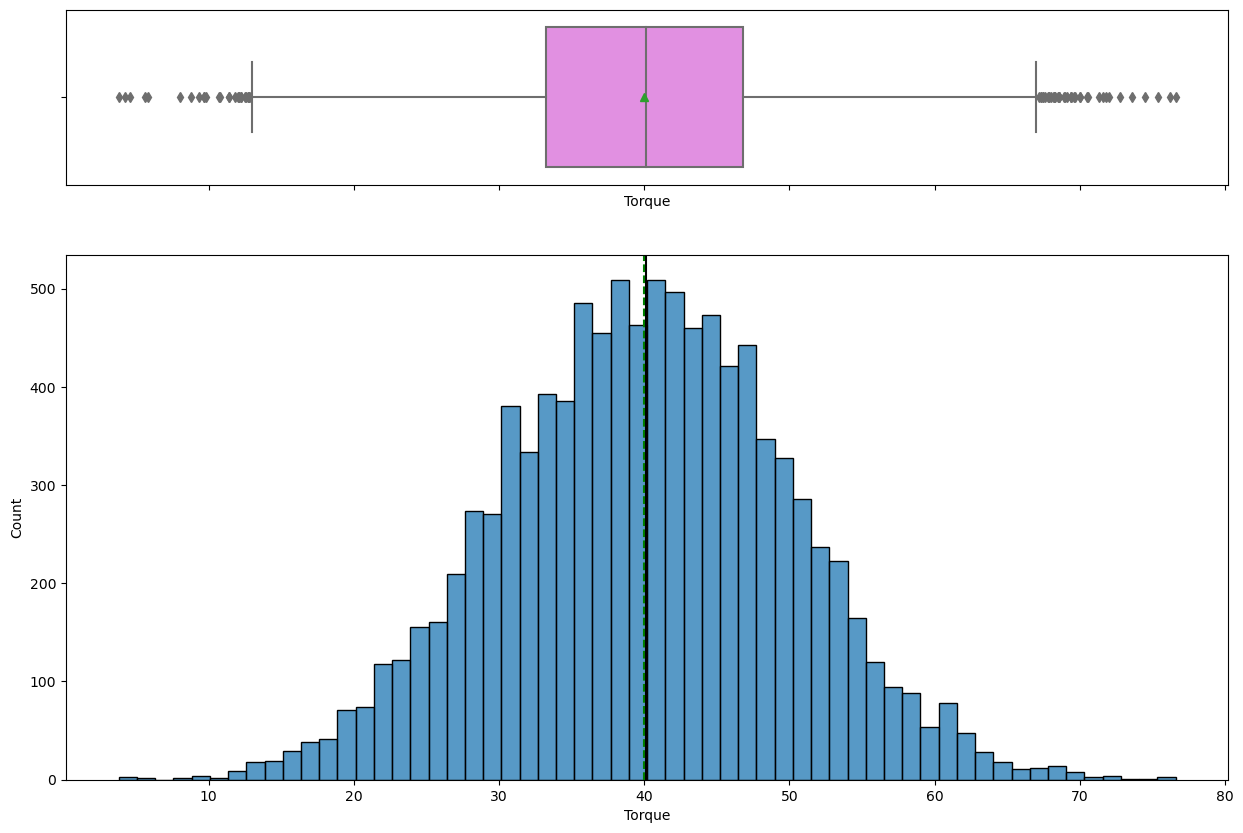

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

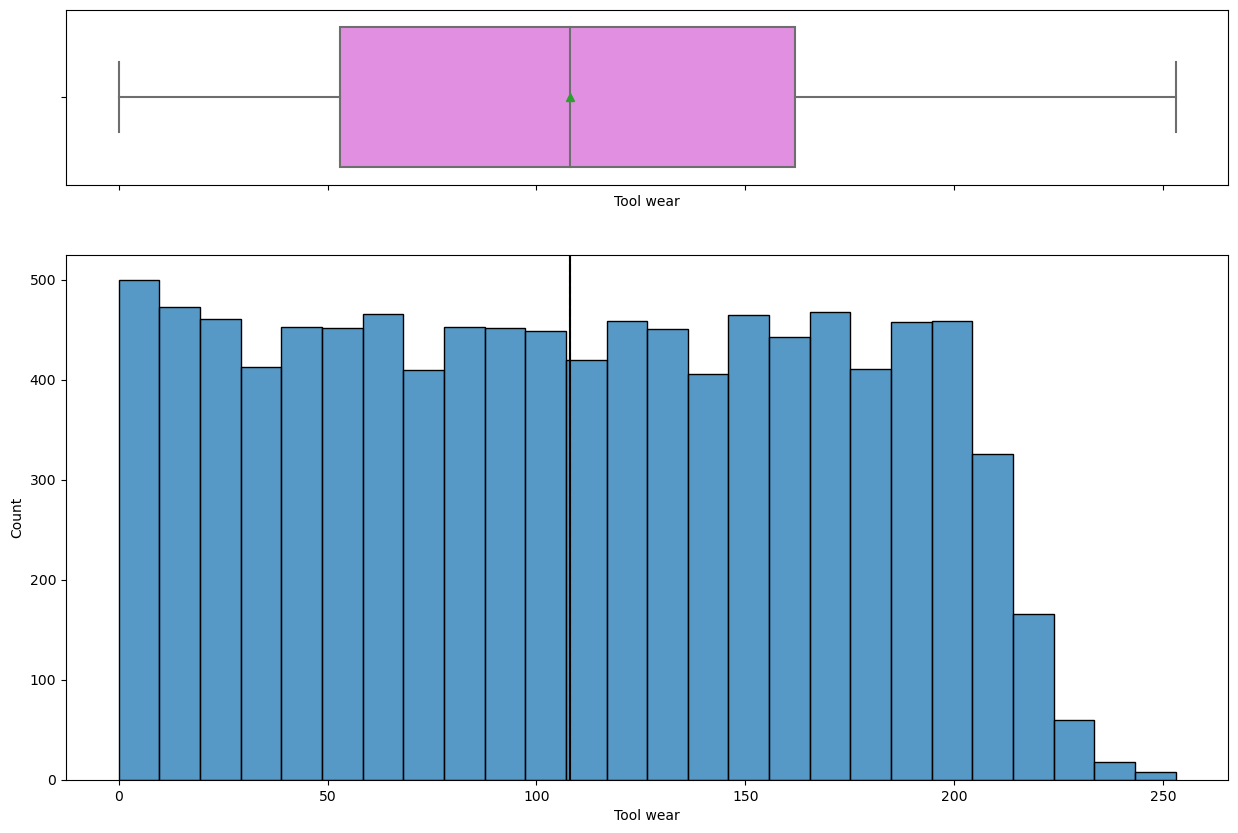

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

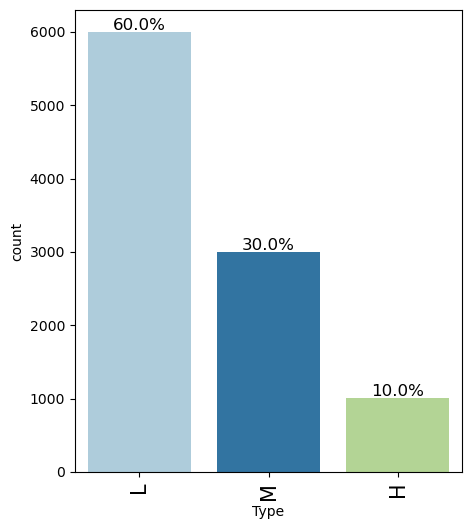

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

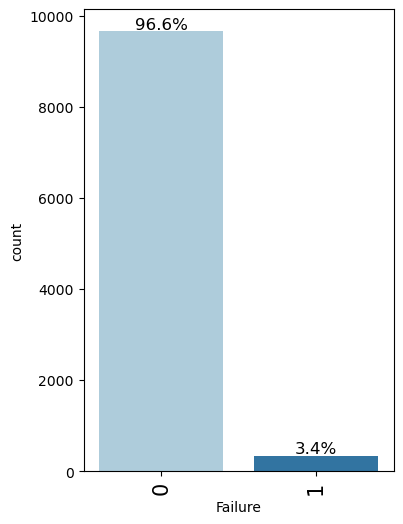

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

# **Bivariate Analysis**

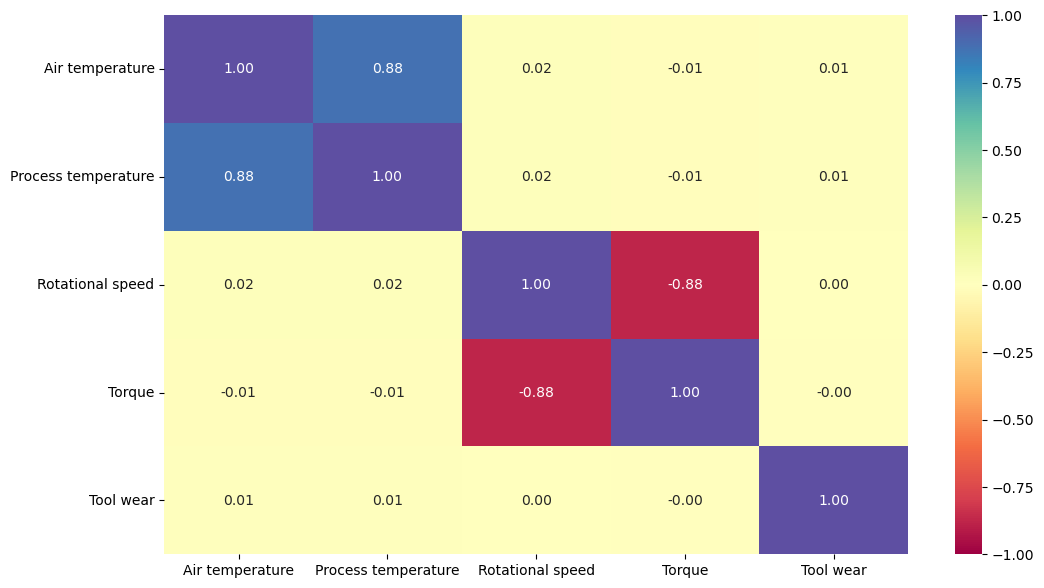

<IPython.core.display.Javascript object>

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Failure")

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`. 
* No other variables are correlated. We will analyze it further.

**How does the target variable vary across the type of the product?**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


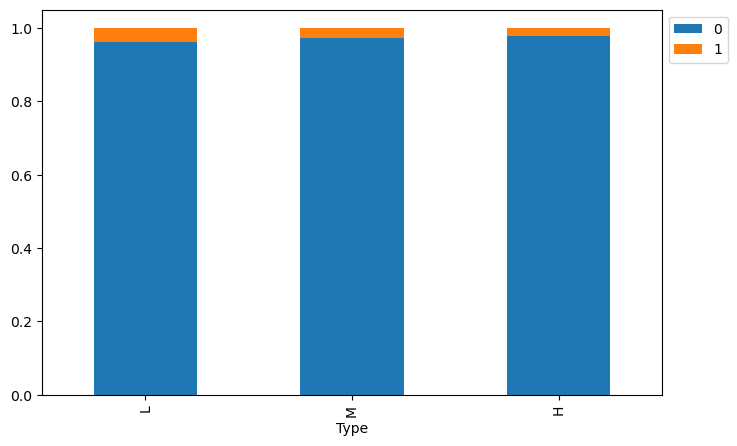

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

**Let's analyze the relation between `Process temperature` and `Failure`.**

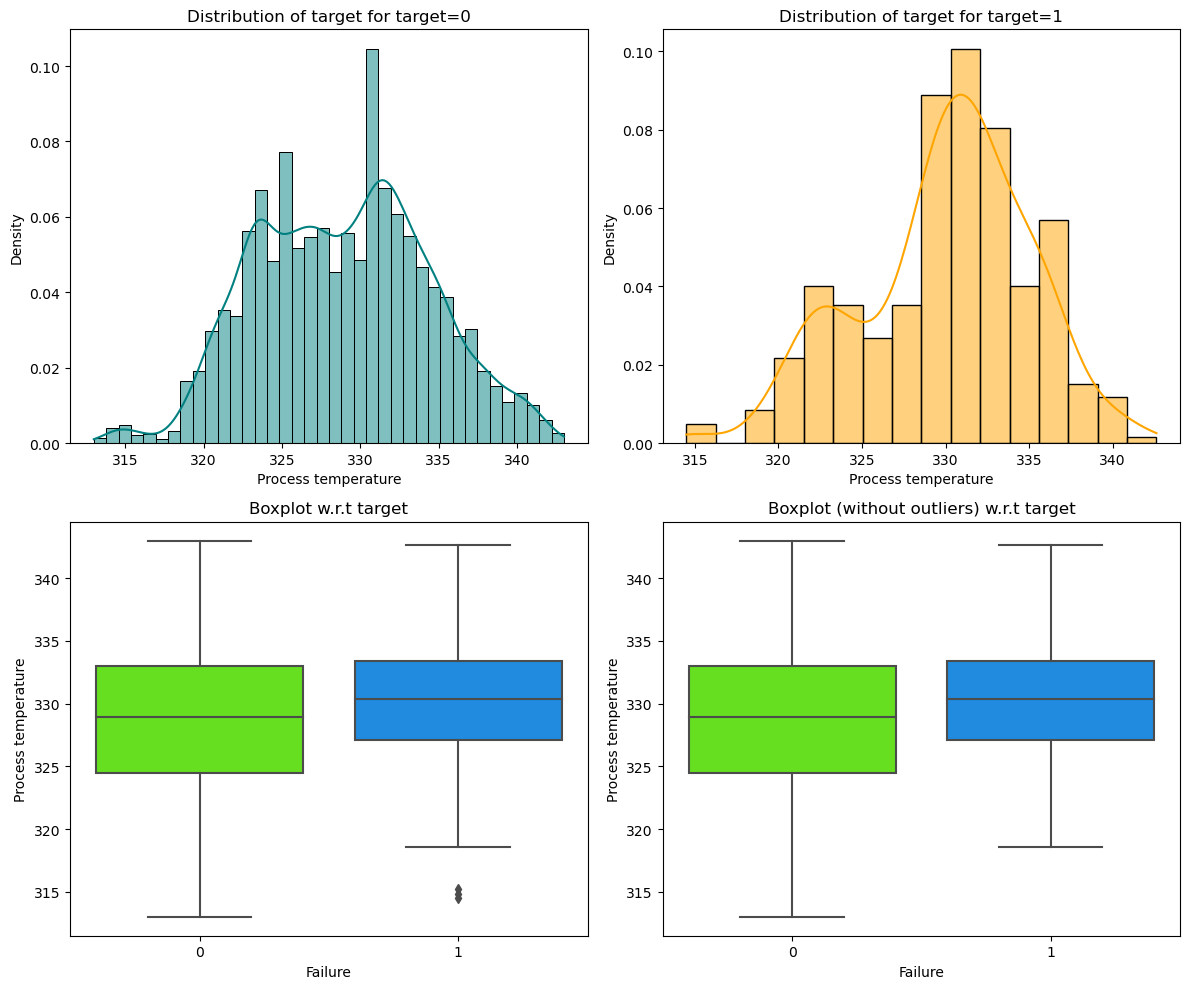

<IPython.core.display.Javascript object>

In [30]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

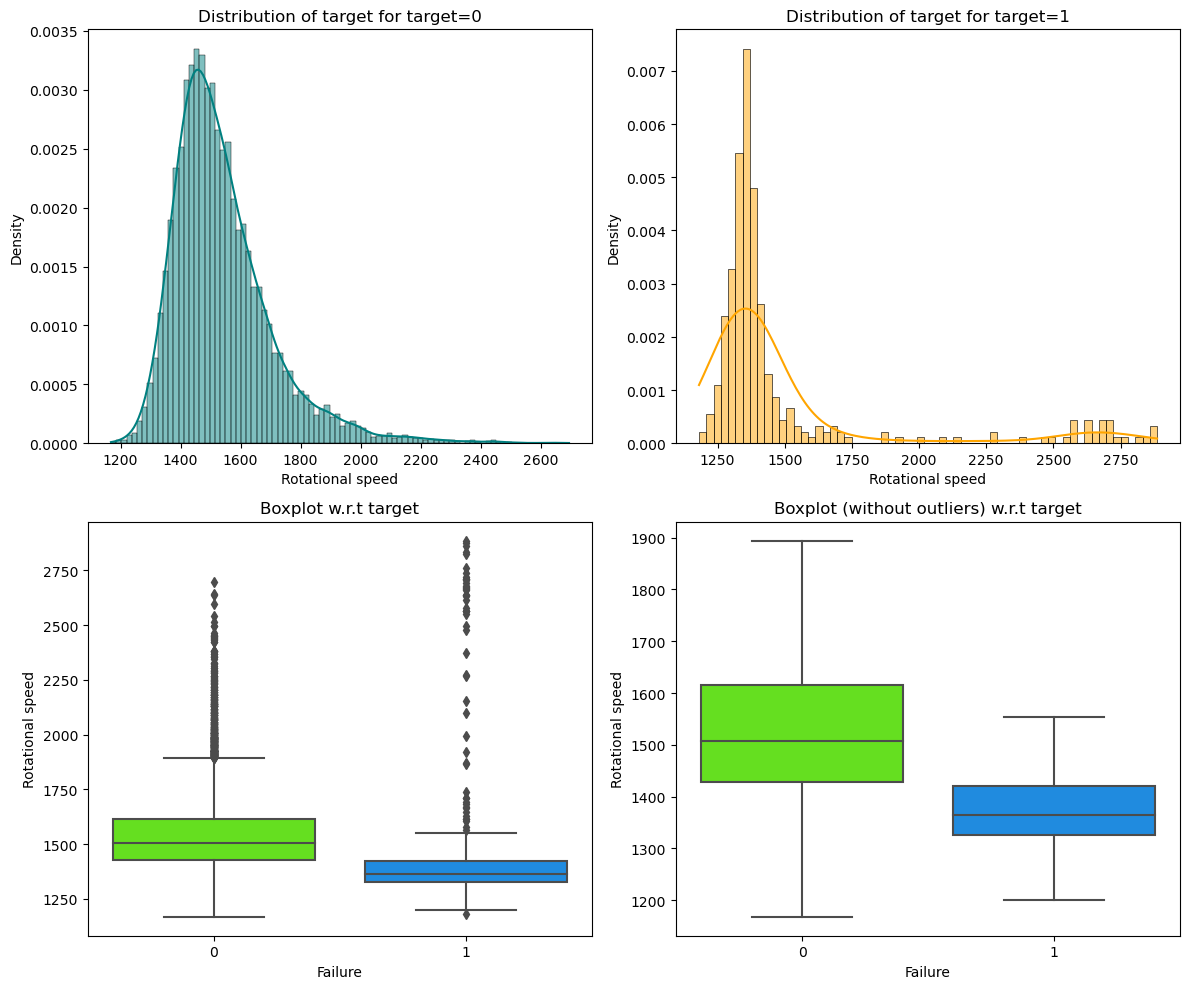

<IPython.core.display.Javascript object>

In [31]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* There is a clear boundary showing separation of failure status based of the values of `Rotational speed`.
* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

## Data Preprocessing

### Outlier Detection

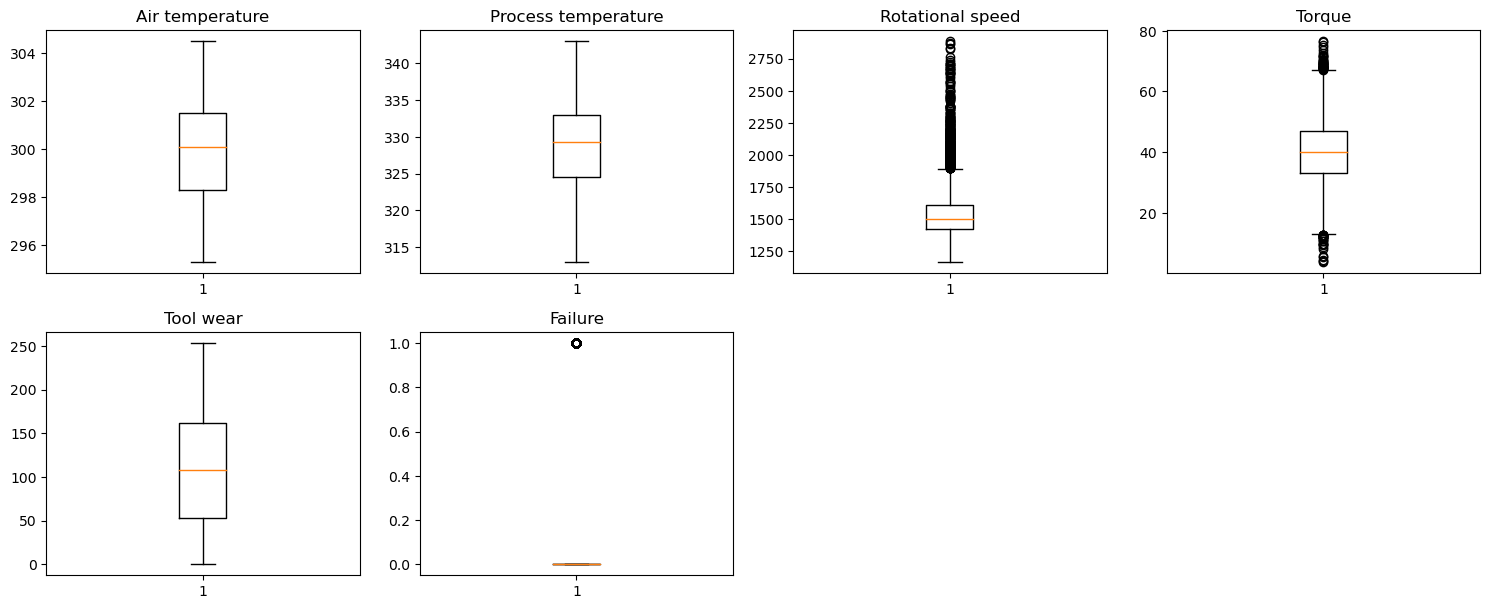

<IPython.core.display.Javascript object>

In [33]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

## Data Preparation for Modeling

In [35]:
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7000, 7)
Shape of test set :  (3000, 7)
Percentage of classes in training set:
0   0.96629
1   0.03371
Name: Failure, dtype: float64
Percentage of classes in test set:
0   0.96567
1   0.03433
Name: Failure, dtype: float64


<IPython.core.display.Javascript object>

* We had seen that around 96.6% of observations belongs to class 0 (Not Failed) and 3.37% observations belongs to class 1 (Failed), and this is preserved in the train and test sets

## Model Building

### Decision Tree (default)

In [37]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [38]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

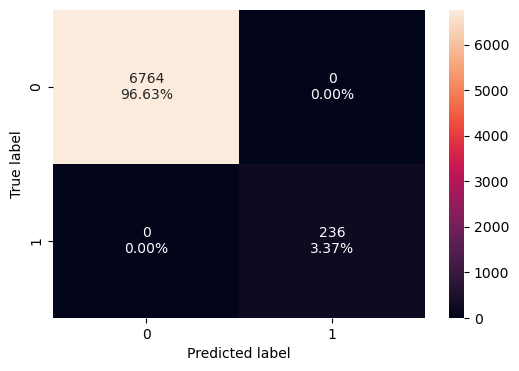

<IPython.core.display.Javascript object>

In [40]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [41]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

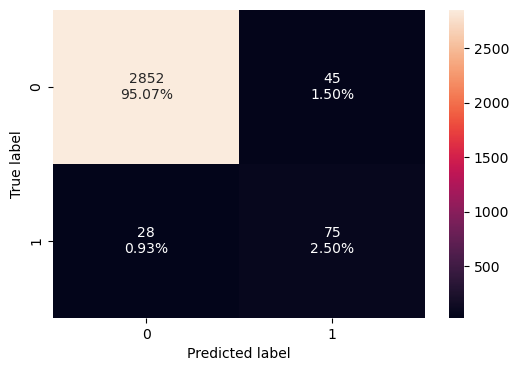

<IPython.core.display.Javascript object>

In [42]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [43]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.97567,0.72816,0.62500,0.67265


<IPython.core.display.Javascript object>

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [45]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

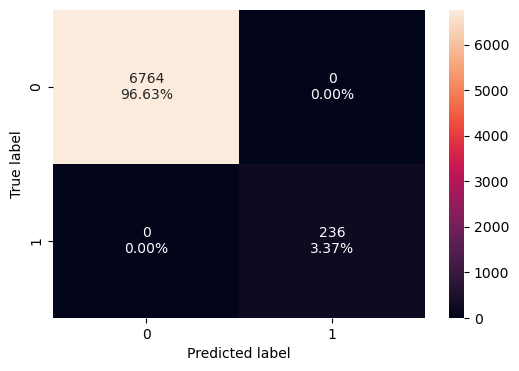

<IPython.core.display.Javascript object>

In [46]:
confusion_matrix_sklearn(model, X_train, y_train)

In [47]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

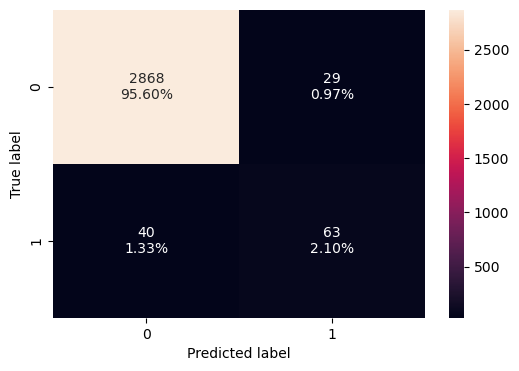

<IPython.core.display.Javascript object>

In [48]:
confusion_matrix_sklearn(model, X_test, y_test)

In [49]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97700,0.61165,0.68478,0.64615


<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.


In [50]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=70, random_state=1)

<IPython.core.display.Javascript object>

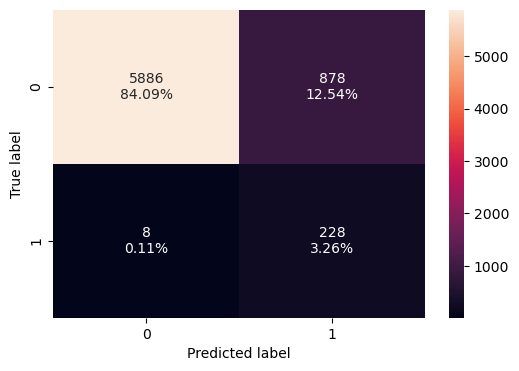

<IPython.core.display.Javascript object>

In [51]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [52]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.87343,0.96610,0.20615,0.33979


<IPython.core.display.Javascript object>

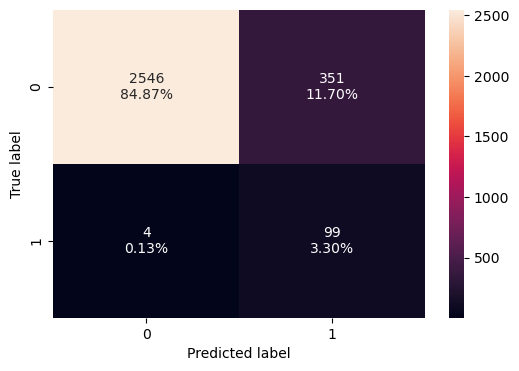

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [54]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.88167,0.96117,0.22000,0.35805


<IPython.core.display.Javascript object>

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

In [55]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

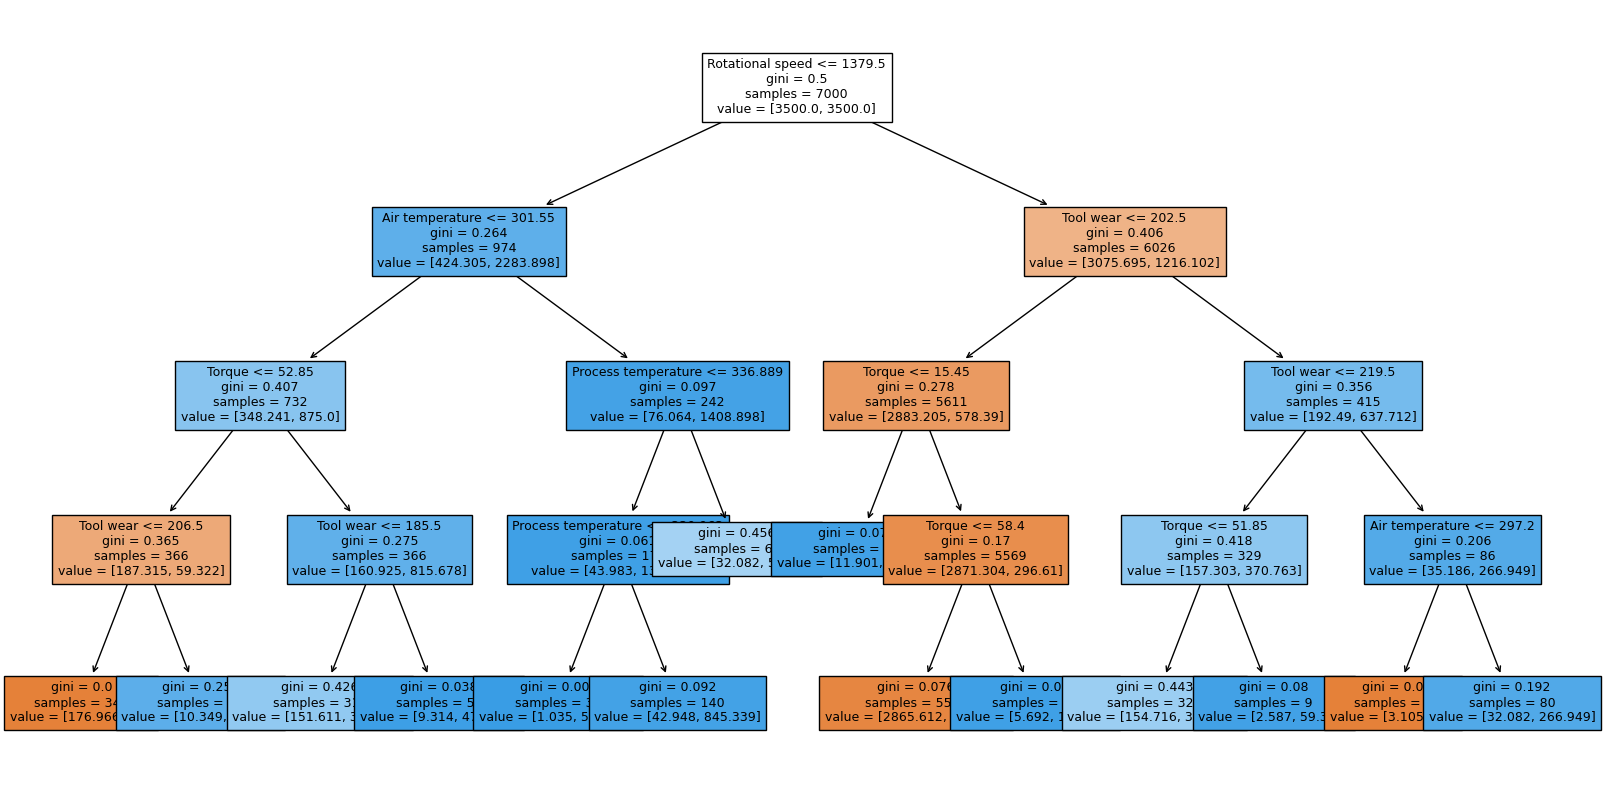

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [57]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- weights: [151.61, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- Process temperature <= 336.89
|   |   |   |--- Process temperature <= 330.96
|   |   |   |   |--- weights: [1.03, 504.24] class: 1
|   |   |   |--- Process temperature >  330.96
|   |   |   |   |--- weights: [42.95, 845.34] class: 1
|   |   |--- Process temperature >  336.89
|   |   |   |--- weights: [32.08, 59.32] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 202.50
|   |   |--- Torque <= 15.45
|   |   |   |--- weights: [11.90, 281.78] c

<IPython.core.display.Javascript object>

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail

Interpretations from other decision rules can be made similarly

In [58]:
importances = estimator.feature_importances_
importances

array([0.03002803, 0.00726903, 0.40080865, 0.32726572, 0.23462857,
       0.        , 0.        ])

<IPython.core.display.Javascript object>

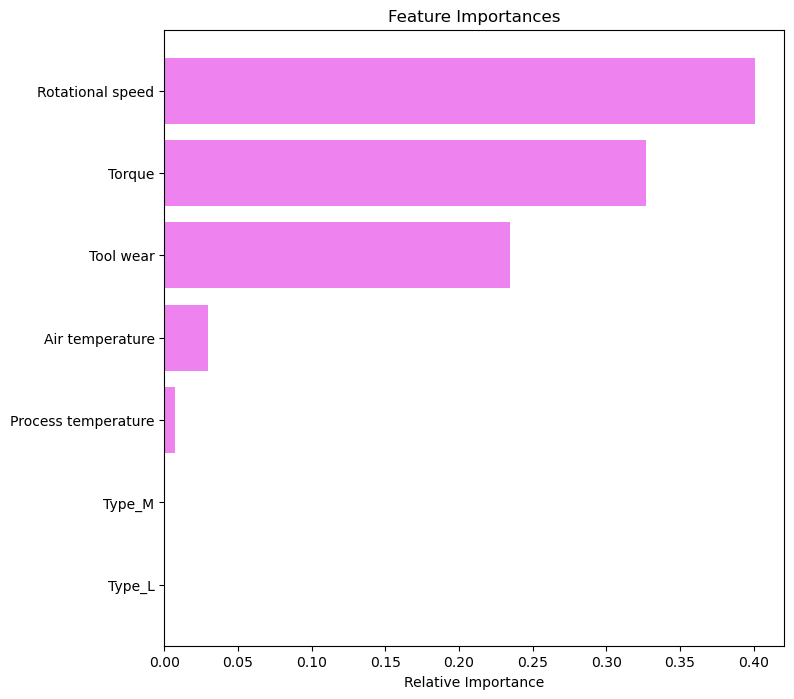

<IPython.core.display.Javascript object>

In [59]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, rotational speed and torque are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [61]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [62]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,-0.00000
1,0.00000,-0.00000
2,0.00000,-0.00000
3,0.00000,-0.00000
4,0.00000,-0.00000
5,0.00000,-0.00000
6,0.00000,-0.00000
7,0.00000,-0.00000
8,0.00000,-0.00000
9,0.00000,-0.00000


<IPython.core.display.Javascript object>

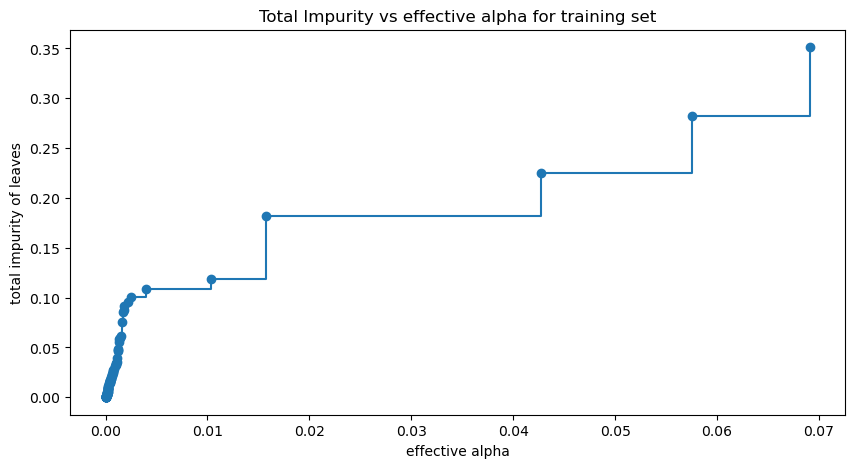

<IPython.core.display.Javascript object>

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [64]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14875976077076158


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

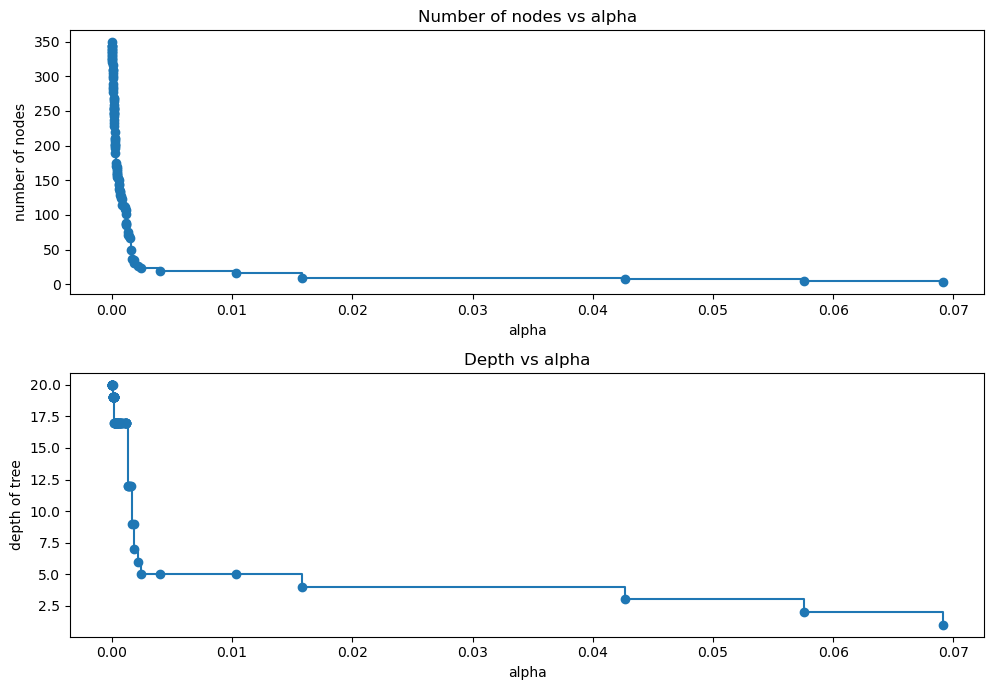

<IPython.core.display.Javascript object>

In [65]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [66]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [67]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [68]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

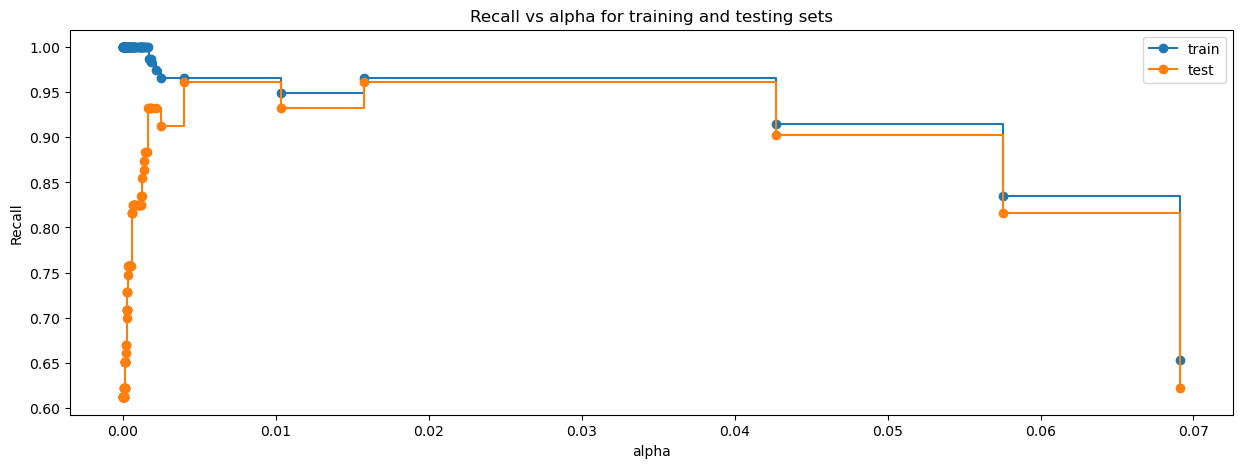

<IPython.core.display.Javascript object>

In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [70]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004008680486241742, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

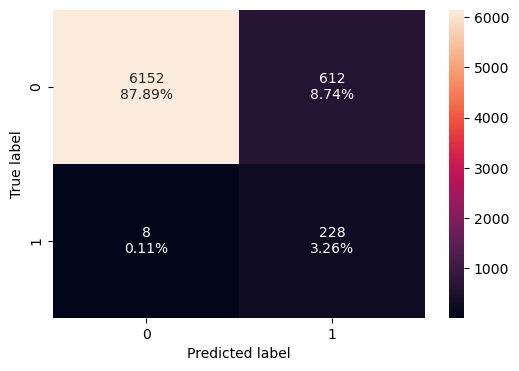

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [72]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.91143,0.96610,0.27143,0.42379


<IPython.core.display.Javascript object>

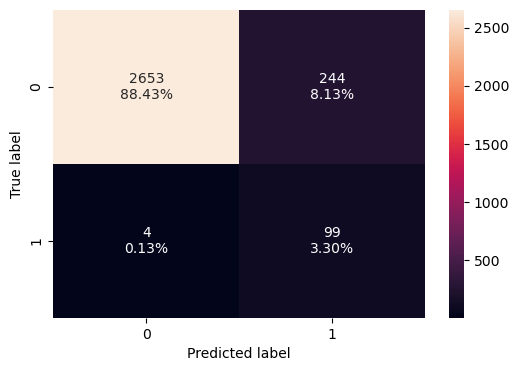

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [74]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.91733,0.96117,0.28863,0.44395


<IPython.core.display.Javascript object>

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.96 which shows that the model is able to generalize well on unseen data.

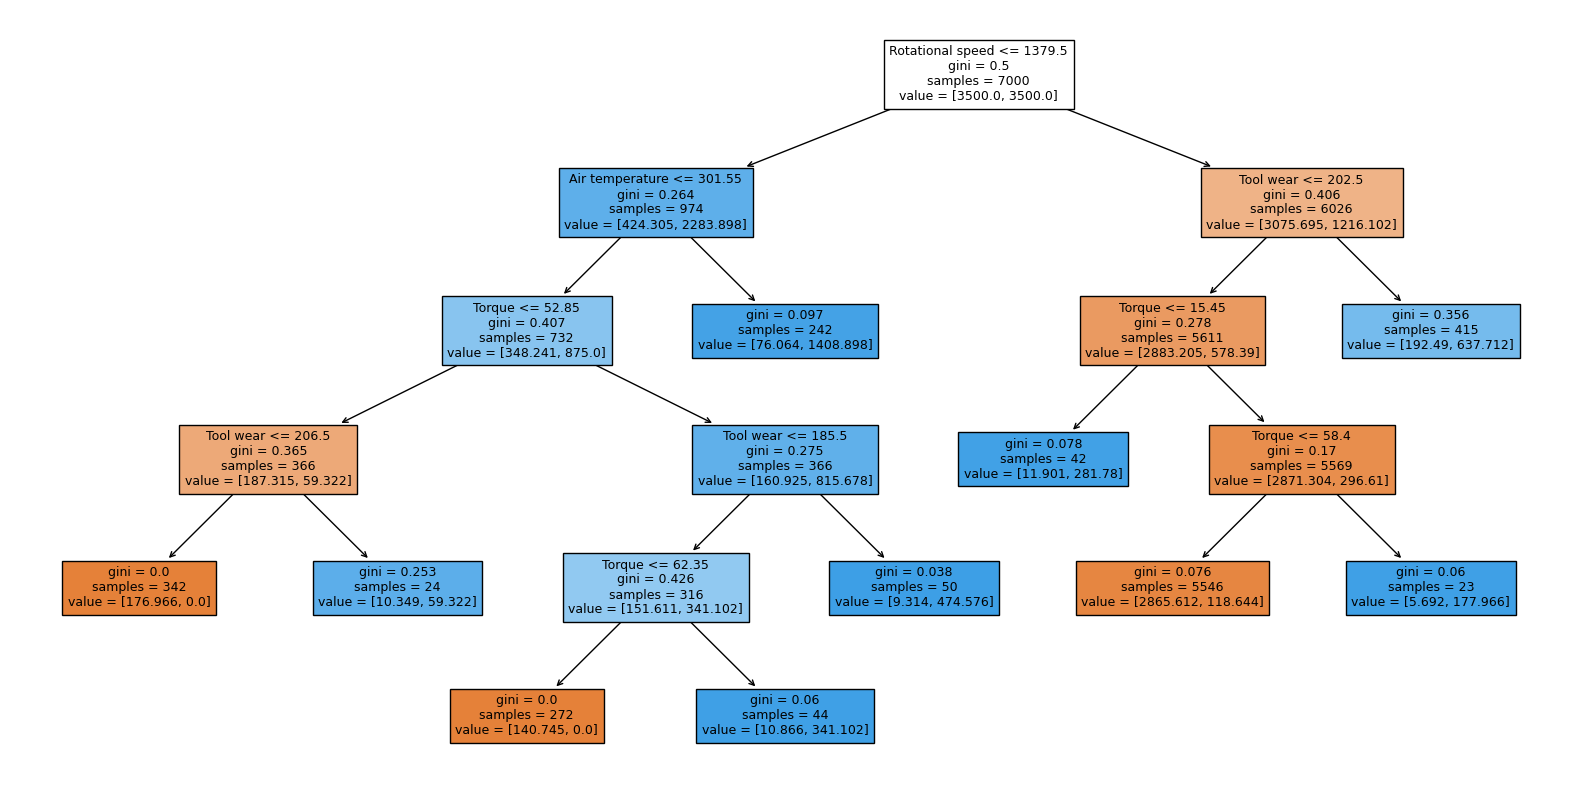

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [76]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Rotational speed <= 1379.50
|   |--- Air temperature <= 301.55
|   |   |--- Torque <= 52.85
|   |   |   |--- Tool wear <= 206.50
|   |   |   |   |--- weights: [176.97, 0.00] class: 0
|   |   |   |--- Tool wear >  206.50
|   |   |   |   |--- weights: [10.35, 59.32] class: 1
|   |   |--- Torque >  52.85
|   |   |   |--- Tool wear <= 185.50
|   |   |   |   |--- Torque <= 62.35
|   |   |   |   |   |--- weights: [140.75, 0.00] class: 0
|   |   |   |   |--- Torque >  62.35
|   |   |   |   |   |--- weights: [10.87, 341.10] class: 1
|   |   |   |--- Tool wear >  185.50
|   |   |   |   |--- weights: [9.31, 474.58] class: 1
|   |--- Air temperature >  301.55
|   |   |--- weights: [76.06, 1408.90] class: 1
|--- Rotational speed >  1379.50
|   |--- Tool wear <= 202.50
|   |   |--- Torque <= 15.45
|   |   |   |--- weights: [11.90, 281.78] class: 1
|   |   |--- Torque >  15.45
|   |   |   |--- Torque <= 58.40
|   |   |   |   |--- weights: [2865.61, 118.64] class: 0
|   |   |   |--- Torque >  58

<IPython.core.display.Javascript object>

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

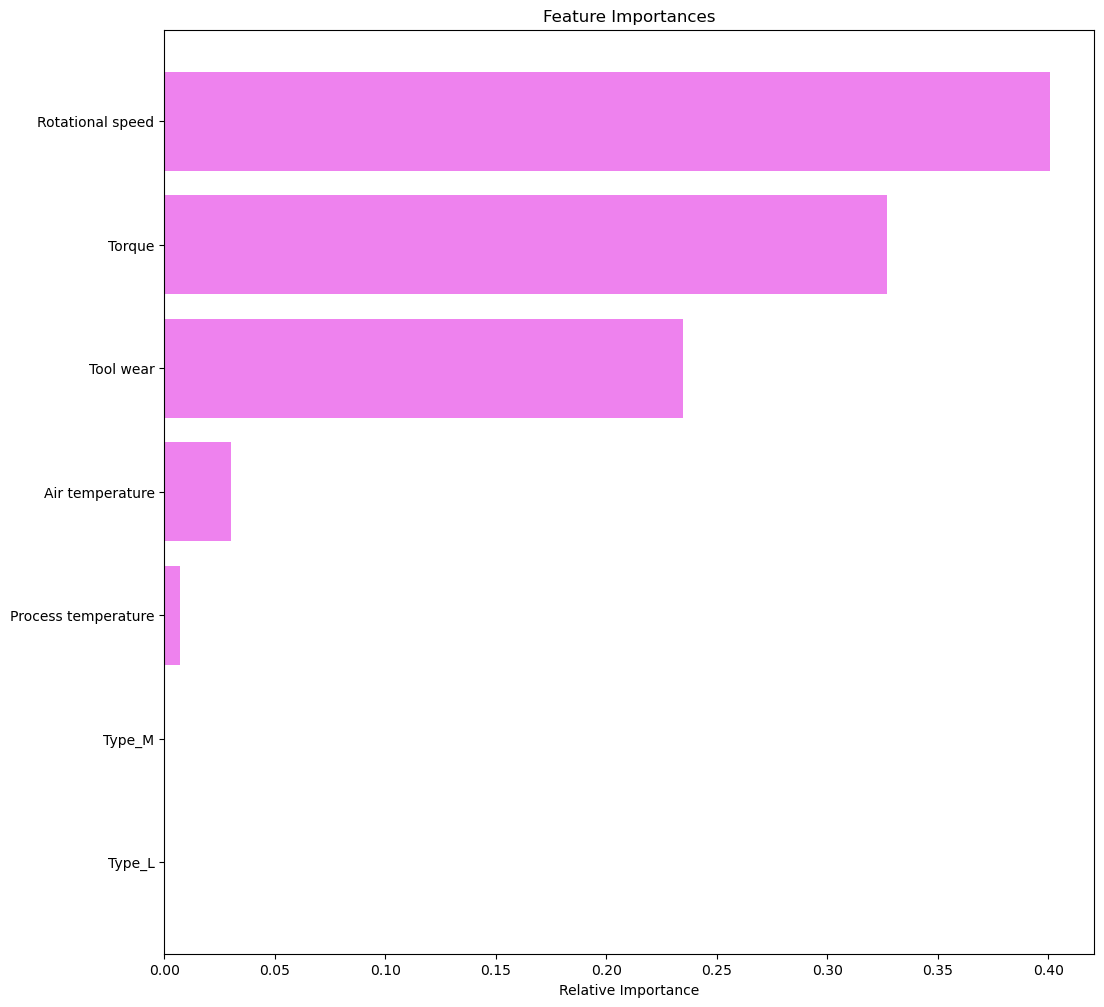

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Rotational speed and Torque are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [79]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.00000,1.00000,0.87343,0.91143
Recall,1.00000,1.00000,0.96610,0.96610
Precision,1.00000,1.00000,0.20615,0.27143
F1,1.00000,1.00000,0.33979,0.42379


<IPython.core.display.Javascript object>

In [80]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.97567,0.97700,0.88167,0.91733
Recall,0.72816,0.61165,0.96117,0.96117
Precision,0.62500,0.68478,0.22000,0.28863
F1,0.67265,0.64615,0.35805,0.44395


<IPython.core.display.Javascript object>

* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Conclusions and Recommendations

- The model built can be used to predict if a machine is going to fail or not and can correctly identify 96.1% of the machine failures

- Rotational speed, torque and tool wear are the most important variables in predicting whether a machine will fail or not

- From the decision tree, it has been observed that if the rotational speed is less than or equal to 1379.50, the air temperature is less than or equal to 301.55, the torque is less than or equal to 52.85 and the tool wear is greater than 206.50, then the machine is most likey to fail
  - The company should give a vigilant eye for these values in order to detect machine failure.


- The company should use more data for the analysis to get more reliable results


- As the variable used vary with the type of operation (turning, drilling, etc.) being performed, the company can look to build separate models for each different type of operation